# House Prices - Advanced regression Tecniques

Predicting the final prices of houses in Ames, Iowa, based on 79 different variables describing various features. From https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

### 1. Loading and splitting the data.
The data is loaded and split into train and test. A further split in train and validation is possible (using a 20% for validation), but due to the small size of the dataset the use of cross validation seems to a better choice.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

data = pd.read_csv('train.csv')
data.shape

(1460, 81)

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


A standard train/test split is applied. For a stratified split further knowledge regarding the data is needed.

In [4]:
from sklearn.model_selection import train_test_split

training, testing = train_test_split(data, test_size=0.2, random_state=0)

### 2. Exploratory analysis and data visualisation 
(missing values and values types, attributes for the numerical values and distributions)

In [5]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 618 to 684
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    956 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          71 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  Overall

Several features are missing data, but according to the description NA is an acceptable category. Only two of the numerical columns ('LotFrontage', 'MasVnrArea') present null values, so those will have to be filled. 

In [6]:
training['Alley'].fillna('NoAlley', inplace=True)
training['FireplaceQu'].fillna('NoFireplace', inplace=True)
training['PoolQC'].fillna('NoPool', inplace=True)
training['Fence'].fillna('NoFence', inplace=True)
training['MiscFeature'].fillna('NoFeature', inplace=True)

training['LotFrontage'].fillna(0, inplace=True)
training['MasVnrArea'].fillna(0, inplace=True)

In [7]:
training.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1110.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,738.685788,56.605308,56.978596,10589.672945,6.086473,5.572774,1970.890411,1984.692637,102.949486,439.890411,45.571918,568.049658,1053.511986,1160.958904,351.479452,6.444349,1518.882705,0.422089,0.054795,1.566781,0.384418,2.882705,1.044521,6.544521,0.612158,1978.140541,1.771404,473.632705,94.498288,48.044521,23.022260,3.218322,14.528253,2.118151,50.936644,6.301370,2007.819349,180808.898973
std,421.609683,42.172322,33.932849,10704.180793,1.367472,1.116908,30.407486,20.684612,182.356257,435.106803,156.229962,437.569919,412.073393,373.315037,438.137938,51.200836,513.800708,0.514494,0.231409,0.546698,0.497118,0.802166,0.218441,1.624493,0.640872,24.877265,0.730041,209.442320,127.312017,68.619199,63.153093,27.916593,54.009608,36.482294,550.380636,2.725977,1.335971,78499.911304
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,373.750000,20.000000,41.750000,7589.500000,5.000000,5.000000,1953.750000,1966.000000,0.000000,0.000000,0.000000,228.000000,798.750000,884.000000,0.000000,0.000000,1139.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,749.500000,50.000000,62.000000,9512.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,379.500000,0.000000,482.500000,992.000000,1092.000000,0.000000,0.000000,1471.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,477.500000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1108.750000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.250000,716.000000,0.000000,811.250000,1276.250000,1389.250000,729.000000,0.000000,1788.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1120.000000,2153.000000,3206.000000,3228.000000,1872.000000,572.000000,4676.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1390.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Plotting numerical values using histograms.

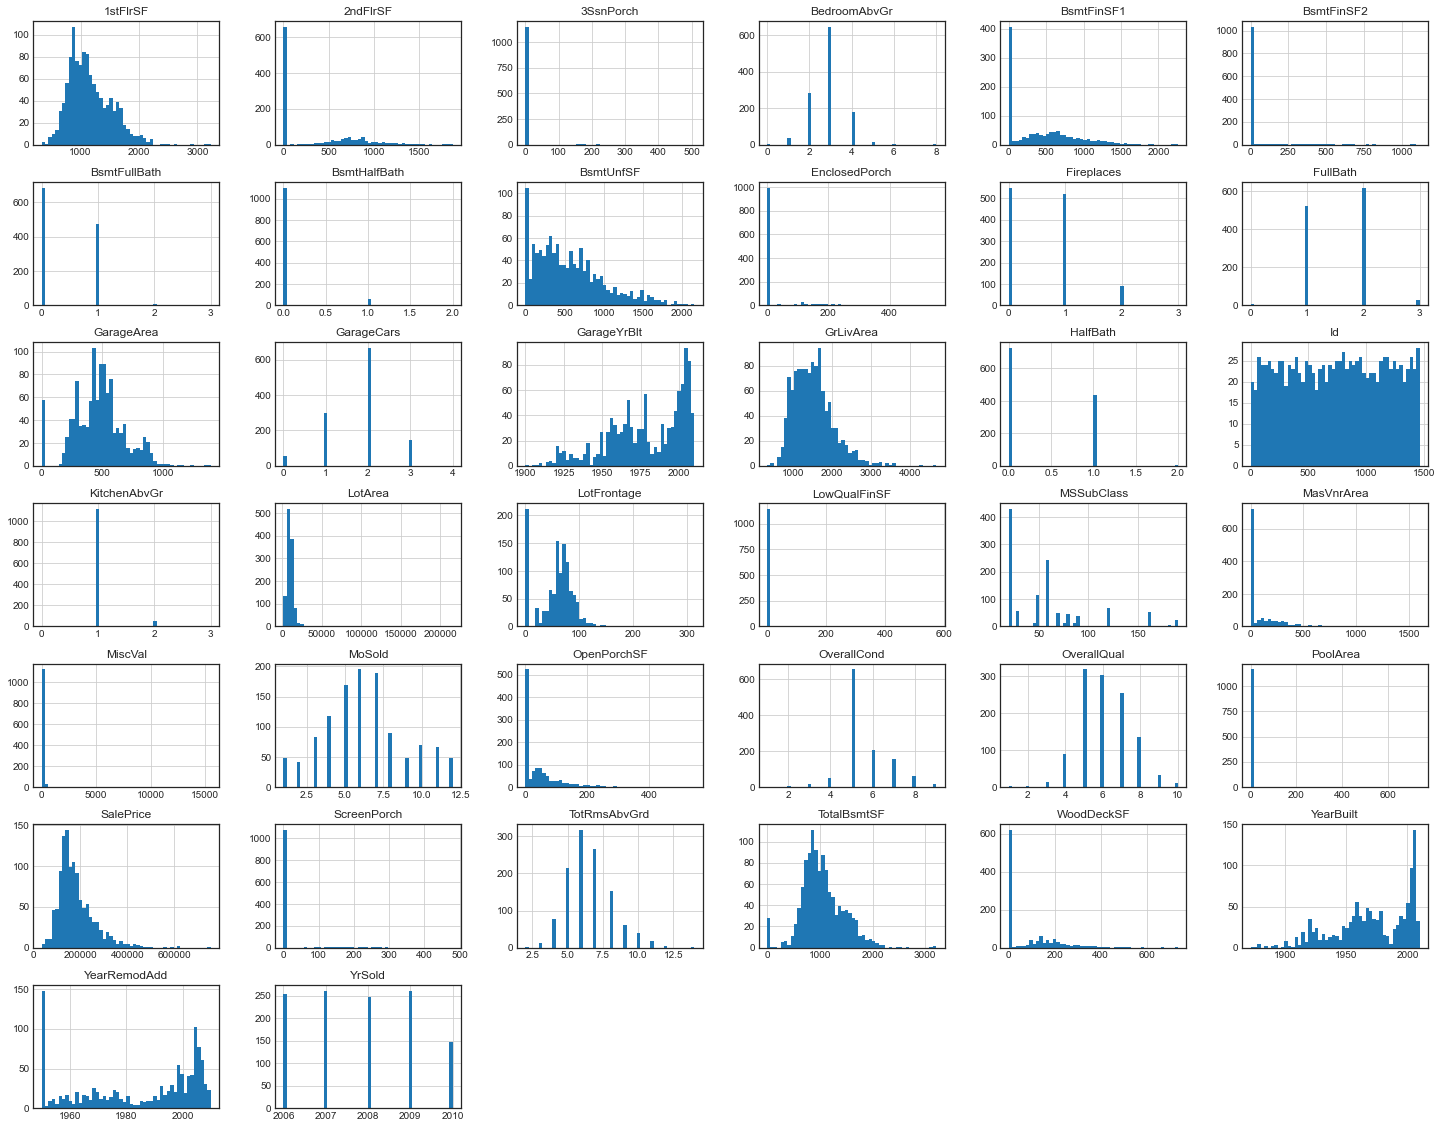

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

training.hist(bins=50, figsize=(25,20))
plt.show()

Quite a few of the distributions have long tails, potentially with outliers. 
To further explore the key features, the correlation coefficients will be calculated and explored via a heatmap.

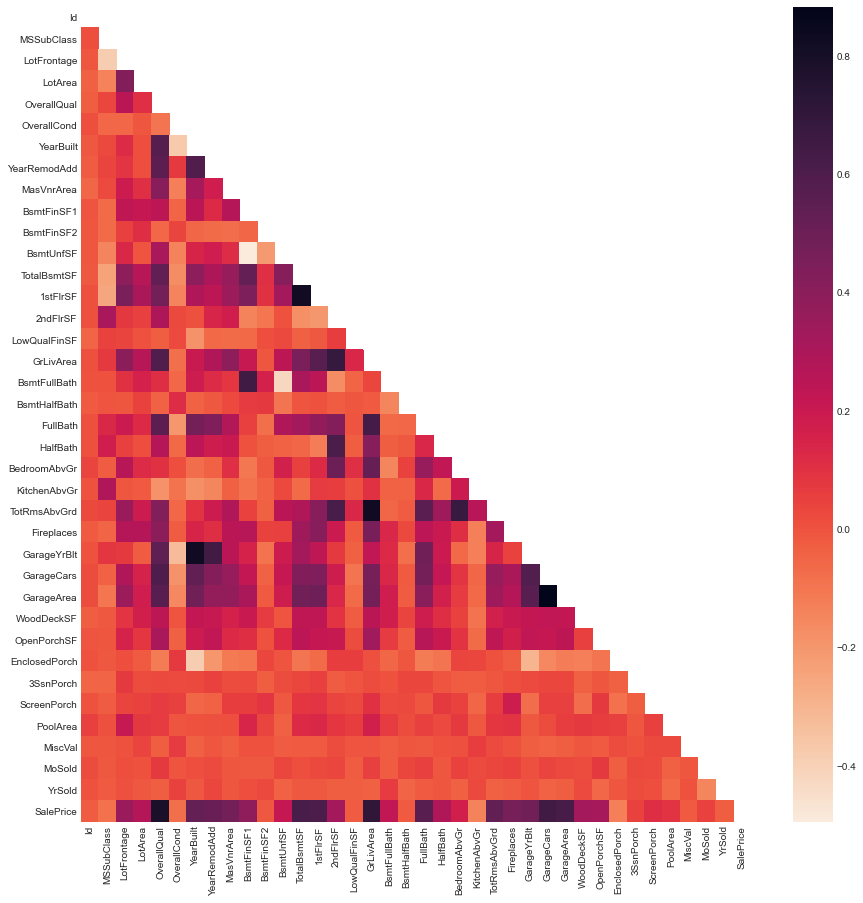

In [9]:
import seaborn as sns
import numpy as np
matrix_correlation = data.corr()

mask = np.triu(np.ones_like(matrix_correlation, dtype=bool))

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(matrix_correlation, mask=mask, cmap='rocket_r', ax=ax)

In [10]:
matrix_correlation['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

Taking the top 6 features for additional plotting.

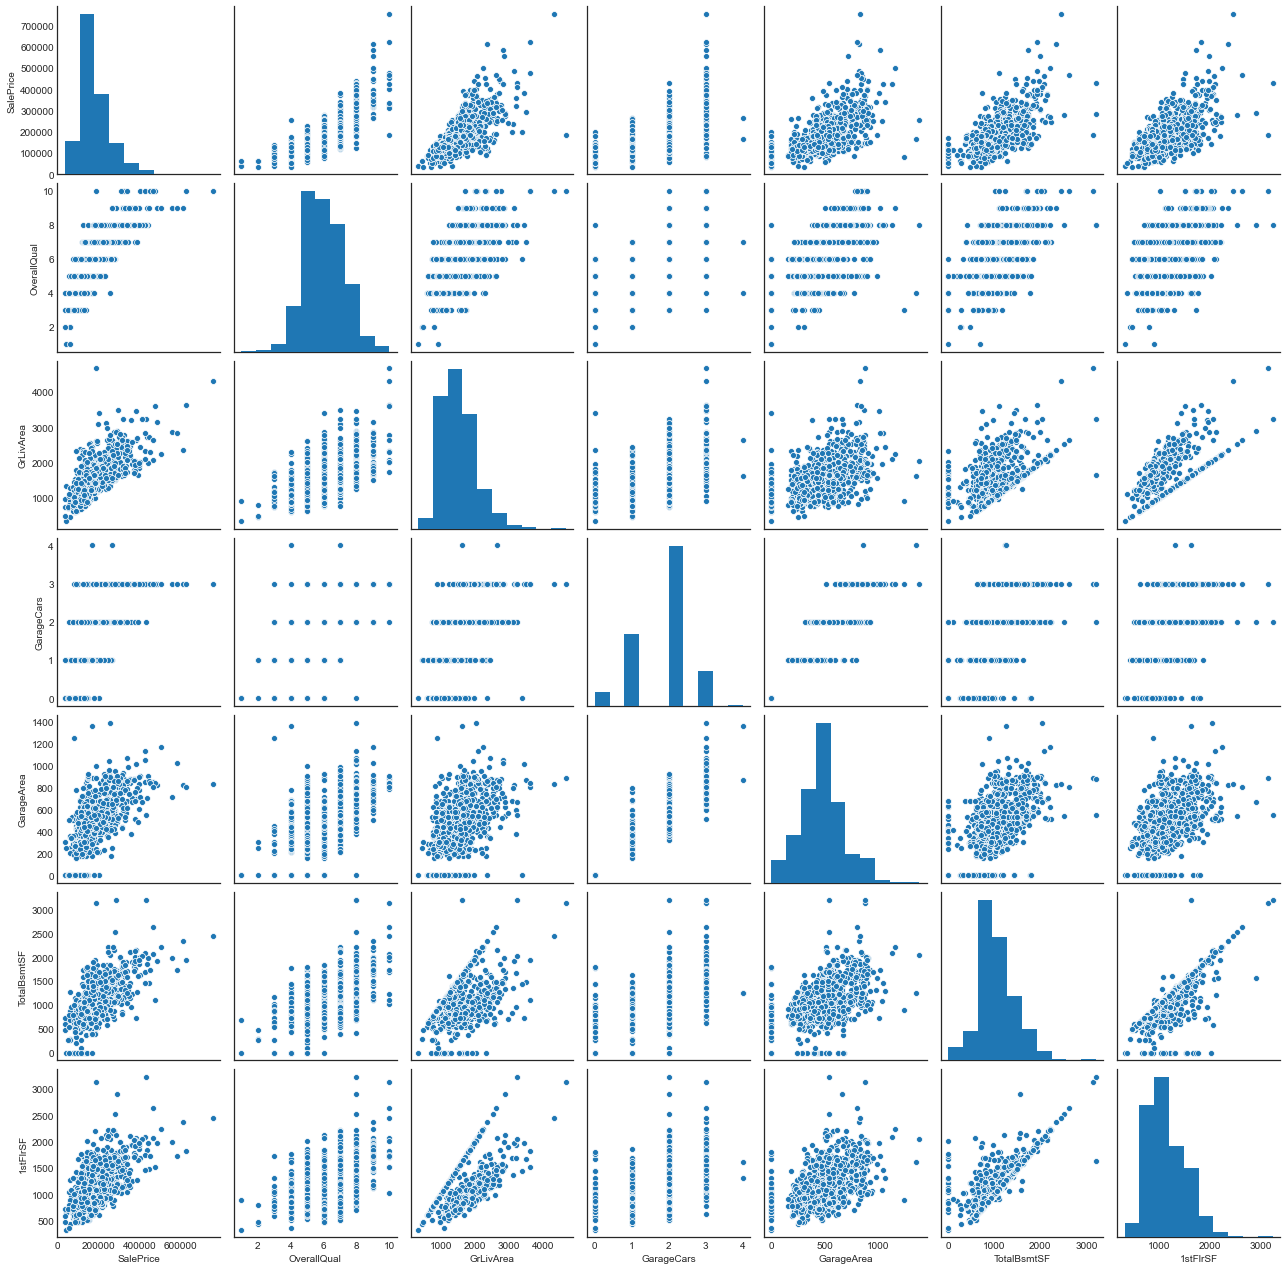

In [11]:
key_features = training[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 
                         'GarageArea', 'TotalBsmtSF', '1stFlrSF']]
sns.pairplot(key_features)
plt.show()

Several of the plots comparing the features and SalePrice show an outlier, with high values for the features but low price. Taking GrLivArea greater than 4000 will help isolating the outlier.

In [12]:
training[training['GrLivArea']>4000][['LotArea','OverallQual', 'Neighborhood','GrLivArea', 
                                      'YearBuilt','SalePrice']]

,LotArea,OverallQual,Neighborhood,GrLivArea,YearBuilt,SalePrice
523,40094,10,Edwards,4676,2007,184750
691,21535,10,NoRidge,4316,1994,755000


Checking whether the Neighbourhood could be a factor in the price.

In [13]:
training[training['Neighborhood']=='Edwards']['SalePrice'].max()

274970

Removing the point from the dataset

In [14]:
training = training[training['GrLivArea']<4500]

### 3. Feature engineering and data transformation

In [15]:
Xtrain = training.drop(['SalePrice', 'Id'], axis=1)
ytrain = training['SalePrice'].copy()

Working on the transformation of the dataset:

-Removing some of the correlated variables and adding a variable that shows the size of the full built area.

-StandardScaler applied to all numeric variables.

-OneHot Encoder applied to all categorical variables

The first step can be added as a custom transformer for a solution that needs to be deployed.

In [16]:
Xtrain['BuiltSF'] = (Xtrain['1stFlrSF']+Xtrain['TotalBsmtSF']+Xtrain['2ndFlrSF'])
ytrain.corr(Xtrain['BuiltSF'])

0.8325438809370511

In [17]:
Xtrain.drop(['GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'GarageArea'], axis=1, inplace=True)

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [19]:
num_variables = Xtrain.select_dtypes(include=np.number).columns.to_list()
obj_variables = Xtrain.select_dtypes(include=object).columns.to_list()

In [20]:
transformation = ColumnTransformer([('numerical', StandardScaler(), num_variables),
                                   ('categorical', OneHotEncoder(handle_unknown='ignore'), 
                                    obj_variables)])
Xtrain_transformed = transformation.fit_transform(Xtrain)

In [21]:
Xtrain_transformed.shape

(1167, 295)

### 4. Selecting the best model

The first model is elastic net, a regularised linear model representing a middle ground between lasso and ridge regularisation.

In [22]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

elastic_net = ElasticNet(random_state=0)
elastic_net_scores = cross_val_score(elastic_net, Xtrain_transformed, ytrain, scoring='neg_mean_squared_log_error',
                                    cv=5)
elastic_net_scores = np.sqrt(-elastic_net_scores)

In [23]:
elastic_net_scores.mean(), elastic_net_scores.std()

(0.1383275810815137, 0.014990791949912314)

The second is an ensemble model, a random forest regressor.

In [24]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=0)
forest_reg_scores = cross_val_score(forest_reg, Xtrain_transformed, ytrain, scoring='neg_mean_squared_log_error',
                                   cv=5)
forest_reg_scores = np.sqrt(-forest_reg_scores)

In [25]:
forest_reg_scores.mean(), forest_reg_scores.std()

(0.13681216966056703, 0.020051215651891902)

Using grid search to optimise the hyperparameters for elastic net. The hyperparameters considered are the intercept, the mix ratio between lasso and ridge (l1_ratio) and alpha, which controls the regularisation.

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid= {'alpha': [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2],
             'fit_intercept':[True, False],
             'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_log_error',
                                verbose=3, n_jobs=-1)
grid_search.fit(Xtrain_transformed, ytrain)

Fitting 5 folds for each of 286 candidates, totalling 1430 fits


GridSearchCV(cv=5, estimator=ElasticNet(random_state=0), n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1, 1.5, 2],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1]},
             scoring='neg_mean_squared_log_error', verbose=3)

In [27]:
grid_search.best_params_

{'alpha': 0.4, 'fit_intercept': True, 'l1_ratio': 0.9}

In [28]:
np.sqrt(-grid_search.best_score_)

0.13418054718440797

It is now possible to check the weights assigned to the different variables, to validate the initial assumptions about their importance.

In [29]:
weights = grid_search.best_estimator_.coef_
cat_encoder = transformation.named_transformers_['categorical']
categories = np.concatenate(cat_encoder.categories_, axis=0)
features = num_variables + categories.tolist()
sorted(zip(weights.astype(int),features), reverse=True)

[(16381, 'GrLivArea'),
 (13692, 'BuiltSF'),
 (12991, 'OverallQual'),
 (11712, 'Ex'),
 (10205, 'Ex'),
 (9670, 'Ex'),
 (9115, 'NoRidge'),
 (8507, 'Gd'),
 (7216, 'Crawfor'),
 (6912, 'Typ'),
 (6839, 'New'),
 (6415, 'OverallCond'),
 (6413, 'YearBuilt'),
 (6322, 'MasVnrArea'),
 (6188, 'Norm'),
 (6085, 'StoneBr'),
 (6025, 'BsmtFinSF1'),
 (5750, 'NridgHt'),
 (5645, 'GarageCars'),
 (5527, 'WdShngl'),
 (5272, '2ndFlrSF'),
 (5266, 'TotalBsmtSF'),
 (4877, 'LotArea'),
 (4747, 'BrkFace'),
 (4726, 'Partial'),
 (4448, 'CulDSac'),
 (3938, 'GLQ'),
 (3268, 'BuiltIn'),
 (3170, 'None'),
 (3170, 'BrkSide'),
 (3098, 'FV'),
 (3008, 'RL'),
 (2969, 'FullBath'),
 (2895, 'Stone'),
 (2793, '1Fam'),
 (2605, 'IR2'),
 (2498, 'Pave'),
 (2377, 'Fireplaces'),
 (2339, 'Ex'),
 (2211, 'CmentBd'),
 (2189, 'Ex'),
 (2147, nan),
 (2147, nan),
 (2147, nan),
 (2147, nan),
 (2088, 'WoodDeckSF'),
 (1989, 'YearRemodAdd'),
 (1921, 'Gtl'),
 (1826, 'SLvl'),
 (1802, 'LotFrontage'),
 (1796, 'Mod'),
 (1750, 'Stucco'),
 (1740, 'Alloca'),


Performing the same transformations on the test data and predicting the prices.

In [30]:
Xtest = testing.drop(['SalePrice', 'Id'], axis=1)
ytest = testing['SalePrice'].copy()

Xtest['Alley'].fillna('NoAlley', inplace=True)
Xtest['FireplaceQu'].fillna('NoFireplace', inplace=True)
Xtest['PoolQC'].fillna('NoPool', inplace=True)
Xtest['Fence'].fillna('NoFence', inplace=True)
Xtest['MiscFeature'].fillna('NoFeature', inplace=True)
Xtest['LotFrontage'].fillna(0, inplace=True)
Xtest['MasVnrArea'].fillna(0, inplace=True)

Xtest['BuiltSF'] = (Xtest['1stFlrSF']+Xtest['TotalBsmtSF']+Xtest['2ndFlrSF'])

Xtest.drop(['GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'GarageArea'], axis=1, inplace=True)

Xtest_transformed = transformation.transform(Xtest)

In [31]:
from sklearn.metrics import mean_squared_log_error

ypred = grid_search.best_estimator_.predict(Xtest_transformed)

np.sqrt(mean_squared_log_error(ytest, ypred))

0.170943870534153

Finally, applying transformations and model to the set for submission.

In [32]:
final = pd.read_csv('test.csv')
final_id = final[['Id']]
final.drop('Id', axis=1, inplace=True)

In [33]:
final['Alley'].fillna('NoAlley', inplace=True)
final['FireplaceQu'].fillna('NoFireplace', inplace=True)
final['PoolQC'].fillna('NoPool', inplace=True)
final['Fence'].fillna('NoFence', inplace=True)
final['MiscFeature'].fillna('NoFeature', inplace=True)
final['LotFrontage'].fillna(0, inplace=True)
final['MasVnrArea'].fillna(0, inplace=True)

for column in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars']:
    final[column].fillna(0, inplace=True)

final['BuiltSF'] = (final['1stFlrSF']+final['TotalBsmtSF']+final['2ndFlrSF'])

final.drop(['GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'GarageArea'], axis=1, inplace=True)

final_transformed = transformation.transform(final)

In [34]:
final_pred = grid_search.best_estimator_.predict(final_transformed)

In [35]:
final_id = final_id.assign(SalePrice=final_pred)

In [36]:
final_id

,Id,SalePrice
0,1461,104093.537985
1,1462,163431.372904
2,1463,188497.435376
3,1464,198312.159179
4,1465,186238.212287
...,...,...
1454,2915,81887.018706
1455,2916,72427.477467
1456,2917,171962.533495
1457,2918,108202.386176


In [37]:
final_id.to_csv('Submission.csv', index=None)